In [ ]:
import pandas as pd
import glob
from pandas.plotting import scatter_matrix
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re 
import os
import datetime
from PIL import Image
import cv2
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/data/Filtered_1000images.csv") 
df.head(2)

,source,image_id,image_path,damage_severity,informative,humanitarian,disaster_types,event_name,tweet_id,tweet_text,image,IsFlood
0,CrisisMMD,910207417345908736_0,data/crisismmd/data_image/hurricane_irma/19_9_...,little_or_none,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.100000e+17,Irma: Naples Estates Watch Now Â·Î©Ã‘9https://...,data_image/hurricane_irma/19_9_2017/9102074173...,1
1,CrisisMMD,909863262371663872_0,data/crisismmd/data_image/hurricane_irma/18_9_...,severe,informative,infrastructure_and_utility_damage,flood,hurricane_irma,9.100000e+17,RT @jimaley: Amazing pix of Irma aftermath htt...,data_image/hurricane_irma/18_9_2017/9098632623...,1


In [ ]:
df = df.sample(frac = 1)
df[600:800]

,source,image_id,image_path,damage_severity,informative,humanitarian,disaster_types,event_name,tweet_id,tweet_text,image,IsFlood
625,CrisisMMD,874121599003185152_0,data/crisismmd/data_image/srilanka_floods/12_6...,little_or_none,not_informative,not_humanitarian,not_disaster,srilanka_floods,8.740000e+17,#Mastercard lends support 2 @WFPÃ¢â‚¬â„¢s floo...,data_image/srilanka_floods/12_6_2017/874121599...,0
516,CrisisMMD,909799240184078338_1,data/crisismmd/data_image/hurricane_irma/18_9_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_irma,9.100000e+17,"@Cypress_K8 Students back to work in a safe, c...",data_image/hurricane_irma/18_9_2017/9097992401...,0
93,CrisisMMD,909447640567476224_0,data/crisismmd/data_image/hurricane_irma/17_9_...,mild,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.090000e+17,American flag standing tall after Irma takes d...,data_image/hurricane_irma/17_9_2017/9094476405...,1
715,CrisisMMD,904666134556819456_0,data/crisismmd/data_image/hurricane_harvey/4_9...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_harvey,9.050000e+17,Gas prices keep climbing in aftermath of Harve...,data_image/hurricane_harvey/4_9_2017/904666134...,0
743,CrisisMMD,912382035704057857_0,data/crisismmd/data_image/hurricane_maria/25_9...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_maria,9.120000e+17,Let the #Ricanstruction begin: #NationalComicB...,data_image/hurricane_maria/25_9_2017/912382035...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
225,CrisisMMD,905445939573252097_0,data/crisismmd/data_image/hurricane_harvey/6_9...,little_or_none,informative,rescue_volunteering_or_donation_effort,hurricane,hurricane_harvey,9.050000e+17,Collecting items in Parker for Harvey Relief D...,data_image/hurricane_harvey/6_9_2017/905445939...,1
589,CrisisMMD,909414772835274752_0,data/crisismmd/data_image/hurricane_irma/17_9_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_irma,9.090000e+17,RT @AnimalRRights: People Who Left Their Dogs ...,data_image/hurricane_irma/17_9_2017/9094147728...,0
899,CrisisMMD,909781251007107072_3,data/crisismmd/data_image/hurricane_irma/18_9_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_irma,9.100000e+17,RVHS remembers! 9/11 remembrance delayed due t...,data_image/hurricane_irma/18_9_2017/9097812510...,0
148,CrisisMMD,904956036733423616_0,data/crisismmd/data_image/hurricane_harvey/5_9...,mild,informative,infrastructure_and_utility_damage,flood,hurricane_harvey,9.050000e+17,Time lapse video shows rapid rise of water in ...,data_image/hurricane_harvey/5_9_2017/904956036...,1


In [ ]:
df

,source,image_id,image_path,damage_severity,informative,humanitarian,disaster_types,event_name,tweet_id,tweet_text,image,IsFlood
909,CrisisMMD,905643081013182465_0,data/crisismmd/data_image/hurricane_harvey/7_9...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_harvey,9.060000e+17,Clean-up volunteers should partner with organi...,data_image/hurricane_harvey/7_9_2017/905643081...,0
831,CrisisMMD,907751765394837504_0,data/crisismmd/data_image/hurricane_harvey/12_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_harvey,9.080000e+17,Saddleback Kiwanis volunteers sew happiness fo...,data_image/hurricane_harvey/12_9_2017/90775176...,0
207,CrisisMMD,904326776905719809_0,data/crisismmd/data_image/hurricane_harvey/3_9...,severe,informative,infrastructure_and_utility_damage,hurricane,hurricane_harvey,9.040000e+17,Texas school districts preparing to take in st...,data_image/hurricane_harvey/3_9_2017/904326776...,1
346,CrisisMMD,909423449239629825_0,data/crisismmd/data_image/hurricane_irma/17_9_...,severe,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.090000e+17,Florida AFL CIO has a disaster relief fund for...,data_image/hurricane_irma/17_9_2017/9094234492...,1
221,CrisisMMD,904370931023441921_0,data/crisismmd/data_image/hurricane_harvey/3_9...,severe,informative,infrastructure_and_utility_damage,flood,hurricane_harvey,9.040000e+17,Expert warns #Harvey will be #US most expensiv...,data_image/hurricane_harvey/3_9_2017/904370931...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98,CrisisMMD,909425041003212800_0,data/crisismmd/data_image/hurricane_irma/17_9_...,severe,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.090000e+17,We are focused on recovery and repair of the C...,data_image/hurricane_irma/17_9_2017/9094250410...,1
250,CrisisMMD,909783378110623744_0,data/crisismmd/data_image/hurricane_irma/18_9_...,severe,informative,affected_injured_or_dead_people,flood,hurricane_irma,9.100000e+17,Irma Victims Get Three Extra Months to Pay Ins...,data_image/hurricane_irma/18_9_2017/9097833781...,1
253,CrisisMMD,910005101019799553_0,data/crisismmd/data_image/hurricane_irma/19_9_...,severe,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.100000e+17,What Hurricane Irma leftÂ behind https://t.co/...,data_image/hurricane_irma/19_9_2017/9100051010...,1
701,CrisisMMD,923585013291147264_0,data/crisismmd/data_image/hurricane_maria/26_1...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_maria,9.240000e+17,"ICYMI: Infections, illnesses loom in the after...",data_image/hurricane_maria/26_10_2017/92358501...,0


In [ ]:
items = df['image_id']
print (items)

909    905643081013182465_0
831    907751765394837504_0
207    904326776905719809_0
346    909423449239629825_0
221    904370931023441921_0
               ...         
98     909425041003212800_0
250    909783378110623744_0
253    910005101019799553_0
701    923585013291147264_0
402    910608268799516672_0
Name: image_id, Length: 1000, dtype: object


In [ ]:
import cv2
import os
images = []
labels = df['IsFlood'].tolist()
items = os.listdir('/content/drive/MyDrive/data/crisismmd/data_image/PCA/')
#print (items)
for each_image in items:
  if each_image.endswith(".jpg"):
    # print(each_image)
    full_path = "/content/drive/MyDrive/data/crisismmd/data_image/PCA/" + each_image
    # print(full_path)
    image = cv2.imread(full_path)
    # print(image)  
     #display image
    from IPython.display import Image
    Image(full_path) 
    #loading and preparing the image
    # from keras.preprocessing.image import load_img
    from tensorflow.keras.utils import load_img
    # load an image from file
    image = load_img(full_path, target_size=(224, 224)) 
    #converting image to array
    #from keras.preprocessing.image import img_to_array
    from tensorflow.keras.utils import img_to_array
    # convert the image pixels to a numpy array
    #image = img_to_array(image).astype(np.uint8)
    image = img_to_array(image).astype(np.uint8)
    images.append(image)

In [ ]:
np.array(images).shape

(1000, 224, 224, 3)

In [ ]:
images_array = np.array(images)

In [ ]:
train_images = np.array(images_array)[:600,:]
validate_images = np.array(images_array)[600:800, :]
test_images = np.array(images_array)[800:, :]

In [ ]:
print('Train images shape:', train_images.shape)
print('Validate images shape:', validate_images.shape)
print('Test images shape:', test_images.shape)

Train images shape: (600, 224, 224, 3)
Validate images shape: (200, 224, 224, 3)
Test images shape: (200, 224, 224, 3)


In [ ]:
# labels_array = [[int(df['IsFlood'][x])] for x in range(len(df))]
labels_array = df['IsFlood']
# Check the shape of the labels_array

In [ ]:
labels_array = np.array(labels_array)
labels_array[600:800]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0])

In [ ]:
train_labels = np.array(labels_array)[:600]
validate_labels = np.array(labels_array)[600:800]
test_labels = np.array(labels_array)[800:]

In [ ]:
print('Train labels shape:', train_labels.shape)
print('Validate labels shape:', validate_labels.shape)
print('Test labels shape:', test_labels.shape)

Train labels shape: (600,)
Validate labels shape: (200,)
Test labels shape: (200,)


In [ ]:
CLASS_NAMES = ['0', '1']

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [ ]:
validation_ds = tf.data.Dataset.from_tensor_slices((validate_images, validate_labels))

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 600
Test data size: 200
Validation data size: 200


In [ ]:
def process_images(image, label):
    #Normalize image to have a mean 0 and standard deviation of 1
    # image = tf.image.per_image_standardization(image)
    #Resize images from  32x32 to 224x224
    # image = tf.image.resize(image, (224,224))
    return image, label

In [ ]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [ ]:
# import tensorflow and keras related libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# create model
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])

In [ ]:
def auxiliary(x, name=None):
    layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu',kernel_regularizer=regularizers.l2(0.0001))(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
    return layer

In [ ]:
def googlenet():
    layer_in = Input(shape=IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(units=256, activation='linear',kernel_regularizer=regularizers.l2(0.0001))(layer)
    main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model

In [ ]:
CLASS_NUM = 2
BATCH_SIZE = 16
IMAGE_SHAPE = (224, 224, 3)
MODEL_NAME = 'googlenet_flood_detection'

In [ ]:
model = googlenet()

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#optimizer = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','Precision','Recall','AUC'])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy',f1_m, precision_m, recall_m])
#model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
#model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['acc'])
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
optimizer = ['Adam', 'SGD', 'Adam', 'SGD']
epochs = [20, 30, 20, 30]
history_all = {}

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
history = model.fit(train_ds,
          epochs=20,
          validation_data=validation_ds,
          validation_freq=1,
          )

Epoch 1/20
18/18 [==============================] - 20s 210ms/step - loss: 2.5402 - main_loss: 0.7118 - aux1_loss: 0.9755 - aux2_loss: 0.7233 - main_accuracy: 0.5069 - main_f1_m: 0.6754 - main_precision_m: 0.5139 - main_recall_m: 1.0000 - aux1_accuracy: 0.5035 - aux1_f1_m: 0.6754 - aux1_precision_m: 0.5139 - aux1_recall_m: 1.0000 - aux2_accuracy: 0.5191 - aux2_f1_m: 0.6754 - aux2_precision_m: 0.5139 - aux2_recall_m: 1.0000 - val_loss: 2.2706 - val_main_loss: 0.6948 - val_aux1_loss: 0.7508 - val_aux2_loss: 0.6978 - val_main_accuracy: 0.4896 - val_main_f1_m: 0.6542 - val_main_precision_m: 0.4896 - val_main_recall_m: 1.0000 - val_aux1_accuracy: 0.4896 - val_aux1_f1_m: 0.6542 - val_aux1_precision_m: 0.4896 - val_aux1_recall_m: 1.0000 - val_aux2_accuracy: 0.4896 - val_aux2_f1_m: 0.6542 - val_aux2_precision_m: 0.4896 - val_aux2_recall_m: 1.0000
Epoch 2/20
18/18 [==============================] - 2s 135ms/step - loss: 2.2364 - main_loss: 0.7062 - aux1_loss: 0.7076 - aux2_loss: 0.6972 - main_a

In [ ]:
score = model.evaluate(test_ds)
print('Score:', score)

6/6 [==============================] - 0s 39ms/step - loss: 5.5661 - main_loss: 1.9587 - aux1_loss: 1.2175 - aux2_loss: 2.2918 - main_accuracy: 0.4479 - main_f1_m: 0.6588 - main_precision_m: 0.4948 - main_recall_m: 1.0000 - aux1_accuracy: 0.4479 - aux1_f1_m: 0.6588 - aux1_precision_m: 0.4948 - aux1_recall_m: 1.0000 - aux2_accuracy: 0.4375 - aux2_f1_m: 0.6588 - aux2_precision_m: 0.4948 - aux2_recall_m: 1.0000
Score: [5.566072940826416, 1.9586809873580933, 1.2174817323684692, 2.2917537689208984, 0.4479166567325592, 0.6588048338890076, 0.4947916567325592, 1.0, 0.4479166567325592, 0.6588048338890076, 0.4947916567325592, 1.0, 0.4375, 0.6588048338890076, 0.4947916567325592, 1.0]


In [ ]:
accuracy = score[4]
accuracy

0.4479166567325592

In [ ]:
loss = score[1]
loss

1.9586809873580933

In [ ]:
F1 = score[5]
F1

0.6588048338890076

In [ ]:
F1 = score[6]
F1

0.4947916567325592

In [ ]:
recall = score[7]
recall

1.0

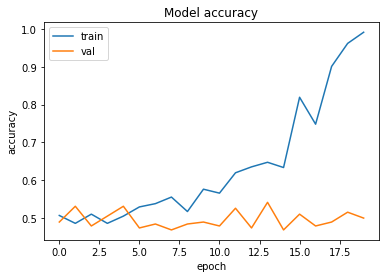

In [ ]:
plt.plot(history.history['main_accuracy'])
plt.plot(history.history['val_main_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

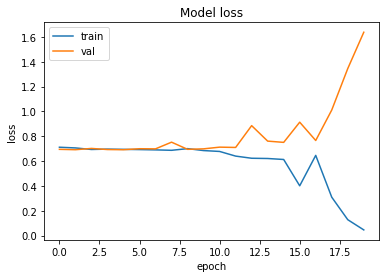

In [ ]:
plt.plot(history.history['main_loss'])
plt.plot(history.history['val_main_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

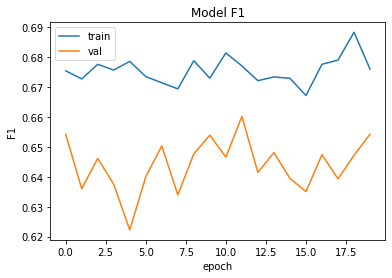

In [ ]:
plt.plot(history.history['main_f1_m'])
plt.plot(history.history['val_main_f1_m'])
plt.title('Model F1')
plt.ylabel('F1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

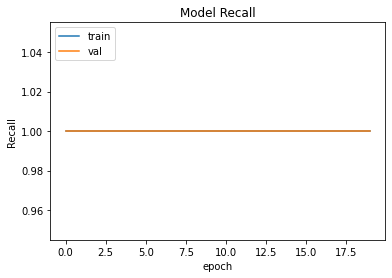

In [ ]:
plt.plot(history.history['main_recall_m'])
plt.plot(history.history['val_main_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

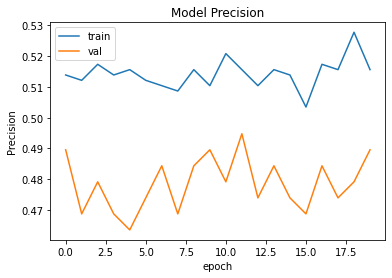

In [ ]:
plt.plot(history.history['main_precision_m'])
plt.plot(history.history['val_main_precision_m'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()